In [50]:
import pandas as pd

In [51]:
df = pd.read_csv('BandStatistics2.csv',index_col=0)
df

,Path,M11_mean,M11_std,M11_max,M11_min,I2_mean,I2_std,I2_max,I2_min,I1_mean,...,forecast temperature_mean,forecast temperature_std,forecast temperature_max,forecast temperature_min,forecast specific humidity_mean,forecast specific humidity_std,forecast specific humidity_max,forecast specific humidity_min,fire_mask_sum,fire_mask_ratio
0,/kaggle/input/wildfirespreadts/WildfireSpreadT...,574.83606,437.39896,4814.0,29.0,2227.6436,574.05480,10453.0,-13.0,354.55103,...,21.838364,1.671008,24.455227,17.614096,0.008245,0.000250,0.008740,0.007709,25.0,0.000374
1,/kaggle/input/wildfirespreadts/WildfireSpreadT...,1140.05980,861.81195,14894.0,139.0,2645.5894,1107.94540,9075.0,515.0,1465.46410,...,14.336805,0.881377,15.961961,12.039895,0.006762,0.000157,0.007280,0.006443,543.0,0.008117
2,/kaggle/input/wildfirespreadts/WildfireSpreadT...,814.61560,983.48540,7725.0,-24.0,2643.6836,1047.21030,7976.0,512.0,825.20090,...,16.754570,1.016683,18.295837,14.924502,0.007235,0.000322,0.007931,0.006531,332.0,0.004963
3,/kaggle/input/wildfirespreadts/WildfireSpreadT...,602.64030,351.35510,9980.0,29.0,2492.8962,763.43243,5807.0,238.0,371.14935,...,16.193296,1.133877,18.330040,14.497375,0.007561,0.000225,0.008154,0.007012,142.0,0.002123
4,/kaggle/input/wildfirespreadts/WildfireSpreadT...,586.94740,359.86893,8374.0,-100.0,2322.2598,480.82570,5169.0,500.0,396.38770,...,21.985150,1.375886,23.871502,18.285303,0.008518,0.000149,0.008821,0.008320,369.0,0.005516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13602,/kaggle/input/wildfirespreadts/WildfireSpreadT...,0.00000,0.00000,0.0,0.0,0.0000,0.00000,0.0,0.0,0.00000,...,24.161963,0.601155,25.174330,23.007660,0.005153,0.000090,0.005425,0.004947,0.0,0.000000
13603,/kaggle/input/wildfirespreadts/WildfireSpreadT...,2812.31300,866.61420,6645.0,557.0,3328.1802,1604.50600,12408.0,663.0,2508.91940,...,24.815756,0.571815,25.834993,23.882328,0.008027,0.000084,0.008379,0.007797,0.0,0.000000
13604,/kaggle/input/wildfirespreadts/WildfireSpreadT...,0.00000,0.00000,0.0,0.0,0.0000,0.00000,0.0,0.0,0.00000,...,23.836287,0.526597,24.787260,22.873259,0.005604,0.000119,0.006017,0.005333,0.0,0.000000
13605,/kaggle/input/wildfirespreadts/WildfireSpreadT...,2202.51100,399.74564,3461.0,656.0,2376.1936,598.09470,5544.0,380.0,1303.07840,...,25.536780,0.578063,26.640163,24.447498,0.005871,0.000070,0.006070,0.005676,0.0,0.000000


In [52]:
fnames = pd.unique(['_'.join(col.split('_')[:-1]) for col in df.columns[1:-2]])
fnames

C:\Users\Ehtesham Ashraf\AppData\Local\Temp\ipykernel_16656\1073000284.py:1: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  fnames = pd.unique(['_'.join(col.split('_')[:-1]) for col in df.columns[1:-2]])


array(['M11', 'I2', 'I1', 'NDVI_last', 'EVI2_last', 'total precipitation',
       'wind speed', 'wind direction', 'minimum temperature',
       'maximum temperature', 'energy release component',
       'specific humidity', 'slope', 'aspect', 'elevation', 'pdsi',
       'LC_Type1', 'total_precipitation_surface_sum',
       'forecast wind speed', 'forecast wind direction',
       'forecast temperature', 'forecast specific humidity'], dtype=object)

In [53]:
(df==0).sum().sort_values(ascending=False)[:50]

aspect_min                              13607
slope_min                               13585
total precipitation_min                 13319
total_precipitation_surface_sum_min      9209
total precipitation_mean                 8020
total precipitation_max                  8020
total precipitation_std                  8020
fire_mask_ratio                          5396
fire_mask_sum                            5396
total_precipitation_surface_sum_mean     4333
total_precipitation_surface_sum_std      4333
total_precipitation_surface_sum_max      4333
wind direction_min                       1610
EVI2_last_min                            1192
NDVI_last_min                            1184
energy release component_min             1140
maximum temperature_min                  1125
minimum temperature_min                  1125
specific humidity_min                    1125
wind speed_min                           1125
M11_min                                  1057
NDVI_last_mean                    

<Axes: >

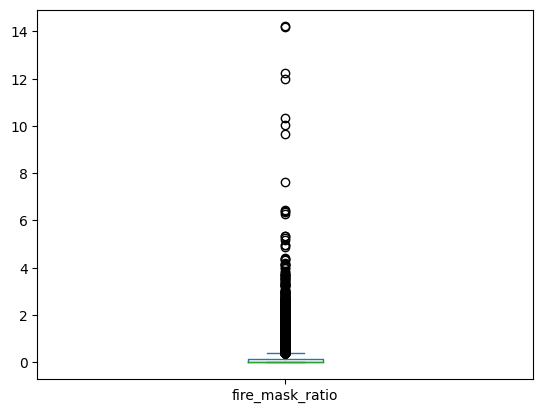

In [54]:
(df['fire_mask_ratio']*100).plot(kind='box')

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
ordered_severity = ["Low (0%-0.1%)", "Medium (0.1%-1%)", "High (1%-5%)", "Very High (>5%)"]
def categorize_fire(ratio):
    if ratio <= 0.001:
        return ordered_severity[0]
    elif 0.001 < ratio <= 0.01:
        return ordered_severity[1]
    elif 0.01 < ratio <= 0.05:
        return ordered_severity[2]
    else:
        return ordered_severity[3]

df['burn_severity'] = df['fire_mask_ratio'].apply(categorize_fire)

# Construct list of "_mean" column names
mean_feature_cols = [f"{feat}_mean" for feat in fnames]

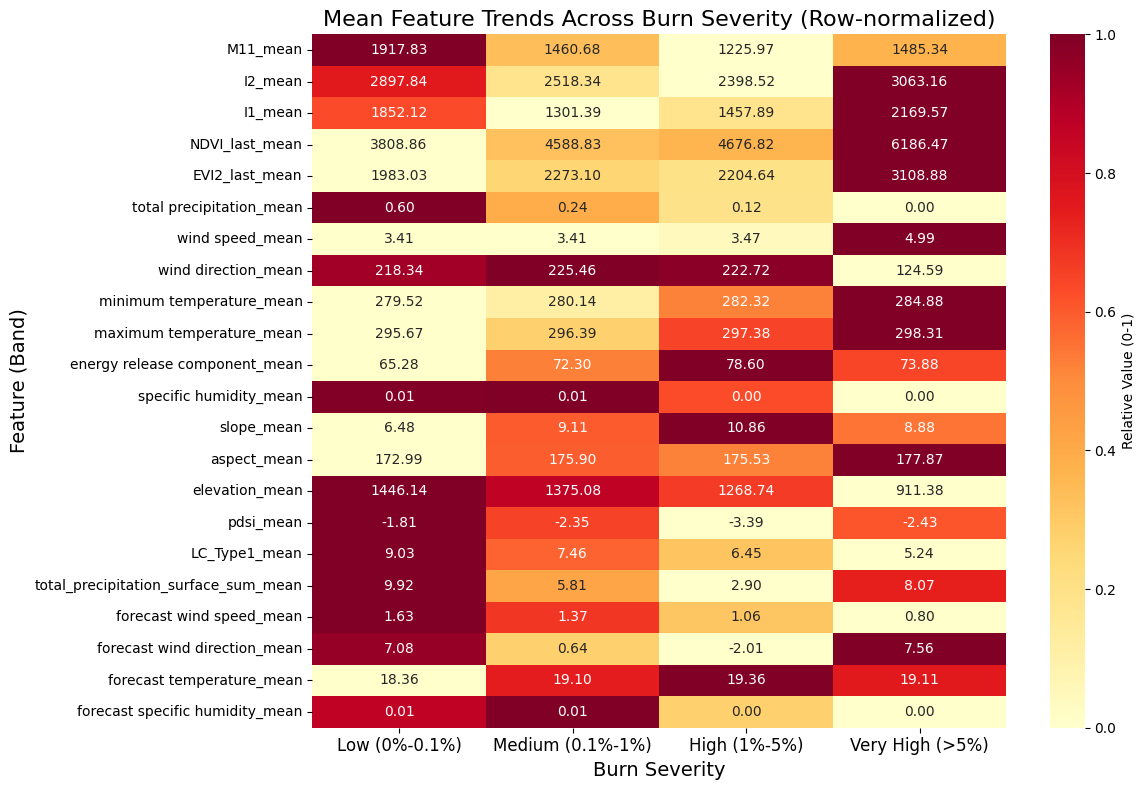

In [61]:
grouped_means = df.groupby('burn_severity')[mean_feature_cols].mean().loc[ordered_severity]
grouped_means_T = grouped_means.T

normalized = grouped_means_T.subtract(grouped_means_T.min(axis=1), axis=0)
normalized = normalized.divide(grouped_means_T.max(axis=1) - grouped_means_T.min(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized, cmap="YlOrRd", annot=grouped_means_T.round(2), fmt=".2f", 
            cbar_kws={'label': 'Relative Value (0-1)','go'})
plt.title("Mean Feature Trends Across Burn Severity (Row-normalized)",fontsize=16)
plt.ylabel("Feature (Band)",fontsize=14)
plt.xlabel("Burn Severity",fontsize=14)
plt.xticks(rotation=0,fontsize=12)
plt.tight_layout()
plt.show()